In [111]:
from pixivpy3 import AppPixivAPI

REFRESH_TOKEN = ""

aapi = AppPixivAPI()
aapi.auth(refresh_token=REFRESH_TOKEN)

{'access_token': '7jt67yA2CotNmRbofCdY3Sbt9l1jcqYkhXVbXB14oBI',
 'expires_in': 3600,
 'token_type': 'bearer',
 'scope': '',
 'refresh_token': 'sLxgrt5L4NP7mKsg5snGjjxJmX4tvD7pRdHhOcsZ-GA',
 'user': {'profile_image_urls': {'px_16x16': 'https://s.pximg.net/common/images/no_profile_ss.png',
   'px_50x50': 'https://s.pximg.net/common/images/no_profile_s.png',
   'px_170x170': 'https://s.pximg.net/common/images/no_profile.png'},
  'id': '64071918',
  'name': 'hwl',
  'account': 'user_kmky2887',
  'mail_address': 'ssttkkl@qq.com',
  'is_premium': False,
  'x_restrict': 0,
  'is_mail_authorized': True},
 'response': {'access_token': '7jt67yA2CotNmRbofCdY3Sbt9l1jcqYkhXVbXB14oBI',
  'expires_in': 3600,
  'token_type': 'bearer',
  'scope': '',
  'refresh_token': 'sLxgrt5L4NP7mKsg5snGjjxJmX4tvD7pRdHhOcsZ-GA',
  'user': {'profile_image_urls': {'px_16x16': 'https://s.pximg.net/common/images/no_profile_ss.png',
    'px_50x50': 'https://s.pximg.net/common/images/no_profile_s.png',
    'px_170x170': '

In [112]:
user = aapi.search_user("秽浊猫").user_previews[0].user

illusts = []
kwargs = dict(user_id=user.id)

while True:
    user_illusts = aapi.user_illusts(**kwargs)
    illusts.extend(user_illusts.illusts)

    kwargs = aapi.parse_qs(user_illusts.next_url)
    if not kwargs:
        break

In [113]:
from datetime import datetime
from time import time

import numpy as np

x = np.zeros(len(illusts))

now = time()
for i, illust in enumerate(illusts):
    x[i] = datetime.fromisoformat(illust.create_date).timestamp() - now

In [114]:
# 概率正比于 exp(归一化后的画像发布时间差)
p = x

min_p = np.min(p)

if min_p == 0:
    p = np.ones(len(illusts))
else:
    p = p / -min_p  # 归一化
    p = np.exp(p)
    p = p / np.sum(p)

Text(0, 0.5, 'p')

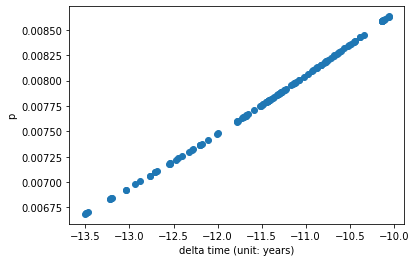

In [115]:
import matplotlib.pyplot as plt

x = x / (86400 * 365)  # 单位：年

plt.scatter(x, p)

plt.xlabel("delta time (unit: years)")
plt.ylabel("p")